In [33]:
from skimage import io 
import pydicom as dicom
import numpy as np 
import time
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt 
from skimage import color
from skimage.morphology import erosion, dilation, opening, closing,disk
from skimage import measure
from skimage.color import label2rgb
import matplotlib.pyplot as plt 
import pandas as pd 
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io, transform


dir = "data/LMRegistration/"
src_img = io.imread(dir +"shoe_1.png")
dst_img = io.imread(dir +"shoe_2.png")



#### Do a landmark based registration of shoe_1.png (the source) to shoe_2.png (the destination) using a similarity transform.


In [34]:
src = np.array([[40, 320], [425, 120], [740, 330]])
dst = np.array([[80, 320], [380, 155], [670, 300]])

### Do a landmark based registration of shoe_1.png (the source) to shoe_2.png (the destination) using a similarity transform.

In [85]:
from skimage.transform import SimilarityTransform
from skimage.transform import matrix_transform

tform = SimilarityTransform()
tform.estimate(src,dst)
registered_image  = transform.warp(src_img, tform.inverse)


#### Extract the found scale of the transform (using for example tform.scale ).


In [65]:
scale = tform.scale
print(scale)

0.8327055808649092


In [66]:
transformed_image_bytes = img_as_ubyte(registered_image)
destination_image_bytes = img_as_ubyte(dst_img)


#### Compare the values of the alignment error, F (sum of squared distances), before and after the registration.


In [70]:
def calculate_alignment_error(src_landmarks, dst_landmarks):
    """
    Calculate the alignment error (F) as the sum of squared distances between landmarks.

    Parameters:
    - src_landmarks (numpy.ndarray): Source landmarks.
    - dst_landmarks (numpy.ndarray): Destination landmarks.

    Returns:
    - alignment_error (float): Sum of squared distances.
    """
    squared_distances = np.sum((src_landmarks - dst_landmarks)**2)
    return squared_distances


alignment_error_before = calculate_alignment_error(src, dst)
print(alignment_error_before)
src_landmarks_registered = tform(src)

alignment_error_after = calculate_alignment_error(src_landmarks_registered,dst)

print(alignment_error_after)


In [72]:
alignment_error_before = calculate_alignment_error(src, dst)
print(alignment_error_before)

10650


In [73]:
src_landmarks_registered = tform(src)

alignment_error_after = calculate_alignment_error(src_landmarks_registered,dst)


In [74]:
print(alignment_error_after)

373.01770826994516


In [75]:
alignment_error_before - alignment_error_after

10276.982291730055

In [51]:
816125.0-10650

805475.0

#### Compare the value of the blue component of the colors values of the aligned images.


#### What is the scale of the similarity transform after it has been estimated?




In [12]:
tform.scale

0.8327055808649092

#### After the source photo has been transformed (using tform.inverse) both the transformed image and the destination image are converted to bytes using img_as_ubyte. Finally, the blue component of both images are extracted at position (200, 200). What is the absolute difference between these values?




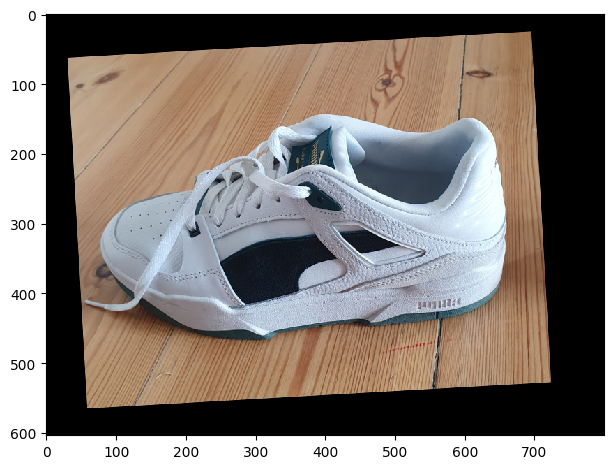

In [22]:
warped = warp(src_img, tform.inverse)

io.imshow(warped)

In [86]:
transformed_image_bytes = img_as_ubyte(registered_image)
destination_image_bytes = img_as_ubyte(dst_img)

In [87]:
blue_component_transformed = transformed_image_bytes[200, 200, 2]
blue_component_destination = destination_image_bytes[200, 200, 2]



In [90]:
absolute_difference = np.abs(  blue_component_destination-blue_component_transformed)
print(absolute_difference)

26


##### What is the change of the landmark alignment error, F, when comparing it before and after the transformation?


